#I. Data folder

Data are saved in three relevant files: \*SegmentedNuclei.csv, \*ShrunkenNuclei.csv and \*Speckles.csv. For the purpose of the project (recognizing discrimanant variables for follow-up hypothesis-driven experimentation), only the first two will be considered.

In [1]:
!ls -lh ../Data/

total 131640
-rw-r--r--  1 Tango  staff    26K Feb 11 23:54 Anne_20160211Experiment.csv
-rw-r--r--  1 Tango  staff   236K Feb 11 23:54 Anne_20160211Image.csv
-rw-r--r--  1 Tango  staff   9.6M Feb 11 23:54 Anne_20160211SegmentedNuclei.csv
-rw-r--r--  1 Tango  staff    10M Feb 11 23:55 Anne_20160211ShrunkenNuclei.csv
-rw-r--r--  1 Tango  staff    44M Feb 11 23:55 Anne_20160211Speckles.csv


Below, we will determine how many columns/variables we have in the dataset.

In [2]:
!head -n2 ../Data/Anne_20160211SegmentedNuclei.csv | awk 'BEGIN{FS=","}{print NF}'

155
155


In [3]:
!tail -n +2 ../Data/Anne_20160211SegmentedNuclei.csv | wc -l 

    3549


In [4]:
!head -n2 ../Data/Anne_20160211ShrunkenNuclei.csv | awk 'BEGIN{FS=","}{print NF}'

177
177


The file above has additional variables quantified.

In [5]:
!tail -n +2 ../Data/Anne_20160211ShrunkenNuclei.csv | wc -l 

    3549


In [6]:
!head -n2 ../Data/Anne_20160211Speckles.csv | awk 'BEGIN{FS=","}{print NF}'

82
82


In [7]:
!tail -n +2 ../Data/Anne_20160211Speckles.csv  | wc -l 

   32211


#II. Dataset preparation    
##Final dataset assembly 
In general, data are spread across the three files listed above, albeit there is most likely quite some redundancy. In the spirit of Andrew Ng advice, we'll build one dataset and then drop some of the feaures. Speckle descriptors will be kept seperate. At the moment there is no point in putting 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.mpl_style','default')

from matplotlib.backends.backend_pdf import PdfPages

import sklearn

%load_ext rpy2.ipython
%matplotlib inline

Below is the list of variables in the file describing detected nuclei.

In [9]:
!head -n2 ../Data/Anne_20160211SegmentedNuclei.csv

In [10]:
!head -n2 ../Data/Anne_20160211ShrunkenNuclei.csv

In [11]:
!head -n2 ../Data/Anne_20160211Speckles.csv

Loading data...

In [12]:
df_n = pd.read_csv('../Data/Anne_20160211SegmentedNuclei.csv')
df_sn = pd.read_csv('../Data/Anne_20160211ShrunkenNuclei.csv')
df_sp = pd.read_csv('../Data/Anne_20160211Speckles.csv')

Dimensions of individual datasets:

In [13]:
df_n.shape, df_sn.shape, df_sp.shape

((3549, 155), (3549, 177), (32211, 82))

Merged nuclei and shrunken nuclei should have dimensions: 

In [14]:
155+177-2

330

In [15]:
df_n.ImageNumber.head(), \
df_sn.ImageNumber.head(), \
df_sp.ImageNumber.head(), \

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: ImageNumber, dtype: int64, 0    1
 1    1
 2    1
 3    1
 4    1
 Name: ImageNumber, dtype: int64, 0    1
 1    1
 2    1
 3    1
 4    1
 Name: ImageNumber, dtype: int64)

In [16]:
df_n.ObjectNumber.head(), \
df_sn.ObjectNumber.head(), \
df_n.Metadata_ImageID.head(), \
#df_nuclei.Metadata_FileLocation.head()[0], \
#df_sh_nuclei.Metadata_FileLocation.head()[0]

(0    1
 1    2
 2    3
 3    4
 4    5
 Name: ObjectNumber, dtype: int64, 0    1
 1    2
 2    3
 3    4
 4    5
 Name: ObjectNumber, dtype: int64, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Metadata_ImageID, dtype: int64)

Best idea is to merge data on file location or ID AND object ID.

In [17]:
df_n.iloc[0:5,0:4]

,ImageNumber,ObjectNumber,Metadata_ExperimentID,Metadata_FileLocation
0,1,1,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
1,1,2,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
2,1,3,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
3,1,4,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
4,1,5,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...


In [18]:
df_sn.iloc[0:5, 0:4]

,ImageNumber,ObjectNumber,Metadata_ExperimentID,Metadata_FileLocation
0,1,1,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
1,1,2,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
2,1,3,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
3,1,4,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...
4,1,5,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...


In [19]:
m_nuc = pd.merge(df_n, df_sn, how = 'left', on = ['ImageNumber', 'ObjectNumber'])

In [20]:
m_nuc.shape

(3549, 330)

In [21]:
m_nuc.columns

Index([u'ImageNumber', u'ObjectNumber', u'Metadata_ExperimentID_x',
       u'Metadata_FileLocation_x', u'Metadata_Frame_x', u'Metadata_ImageID_x',
       u'Metadata_Series_x', u'Metadata_Stain_x', u'Metadata_Treatment_x',
       u'AreaShape_Area', 
       ...
       u'Texture_SumEntropy_RawInput_5_0_y',
       u'Texture_SumEntropy_RawInput_5_90_y',
       u'Texture_SumVariance_RawInput_10_0_y',
       u'Texture_SumVariance_RawInput_10_90_y',
       u'Texture_SumVariance_RawInput_5_0_y',
       u'Texture_SumVariance_RawInput_5_90_y',
       u'Texture_Variance_RawInput_10_0_y',
       u'Texture_Variance_RawInput_10_90_y',
       u'Texture_Variance_RawInput_5_0_y',
       u'Texture_Variance_RawInput_5_90_y'],
      dtype='object', length=330)

The dimensions are as planned.

In [22]:
df_sp.iloc[0:30, 0:5]

,ImageNumber,ObjectNumber,Metadata_ExperimentID,Metadata_FileLocation,Metadata_Frame
0,1,1,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
1,1,2,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
2,1,3,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
3,1,4,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
4,1,5,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
5,1,6,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
6,1,7,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
7,1,8,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
8,1,9,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0
9,1,10,Exp1,file:/Volumes/Seagate_RED/A_Heald_Lab/A_My_pap...,0


Below we define types of varaibles.

Accessories:   
**Object locators** are defined by a suffix \_X and \_Y. 
Have in mind that the way the speckles are spatially distributed may have a significance too. Here, we'll ignore this aspect.    
**Metadata** contain experimental details. They are, in fact, categorical explanatory (or confounding) variables. 

In [23]:
def findLocatorsInDF(data_frame):
    pattern = re.compile(r'.*_X.*|.*_Y.*')
    list_of_locators = []
    for column in data_frame.columns:
        if  re.match(pattern,column) !=None:
            list_of_locators.append(re.match(pattern,column).group())
    return list_of_locators  

In [24]:
def findMetadataInDF(data_frame):
    meta_data=[]
    for col_name in data_frame.columns:
        if re.match(r'.*(data).*', col_name) != None:
            meta_data.append(re.match(r'.*(data).*', col_name).group(0))
    
    meta_data=list((df_n.columns[0:2])) + meta_data
    meta_data.append('Number_Object_Number')
    return list(meta_data)

There is a redunadancy in the two columns below. The np.all() test shows it.

In [25]:
df_sp[['ObjectNumber', 'Number_Object_Number']].iloc[0:5,:]
print np.all(df_sp.ObjectNumber == df_sp.Number_Object_Number)
print np.all(df_n.ObjectNumber == df_n.Number_Object_Number)
print np.all(df_sn.ObjectNumber == df_sn.Number_Object_Number)

True
True
True


Speckles also contain 'Parent_ShrunkenNuclei' (metadata).

In [26]:
metadata_df_nuclei = findMetadataInDF(df_n)

In [27]:
findMetadataInDF(df_n), \
len(findMetadataInDF(df_n)), \
findLocatorsInDF(df_n), \
len(findLocatorsInDF(df_n)),\
findMetadataInDF(df_sn), \
len(findMetadataInDF(df_sn)), \
findLocatorsInDF(df_sn), \
len(findLocatorsInDF(df_sn)), \
findMetadataInDF(df_sp), \
len(findMetadataInDF(df_sp))+1, \
findLocatorsInDF(df_sp), \
len(findLocatorsInDF(df_sp))

(['ImageNumber',
  'ObjectNumber',
  'Metadata_ExperimentID',
  'Metadata_FileLocation',
  'Metadata_Frame',
  'Metadata_ImageID',
  'Metadata_Series',
  'Metadata_Stain',
  'Metadata_Treatment',
  'Number_Object_Number'],
 10,
 ['AreaShape_Center_X',
  'AreaShape_Center_Y',
  'Location_CenterMassIntensity_X_ImageAfterMathLamina',
  'Location_CenterMassIntensity_X_RawInput',
  'Location_CenterMassIntensity_Y_ImageAfterMathLamina',
  'Location_CenterMassIntensity_Y_RawInput',
  'Location_Center_X',
  'Location_Center_Y',
  'Location_MaxIntensity_X_ImageAfterMathLamina',
  'Location_MaxIntensity_X_RawInput',
  'Location_MaxIntensity_Y_ImageAfterMathLamina',
  'Location_MaxIntensity_Y_RawInput'],
 12,
 ['ImageNumber',
  'ObjectNumber',
  'Metadata_ExperimentID',
  'Metadata_FileLocation',
  'Metadata_Frame',
  'Metadata_ImageID',
  'Metadata_Series',
  'Metadata_Stain',
  'Metadata_Treatment',
  'Number_Object_Number'],
 10,
 ['Location_CenterMassIntensity_X_ImageAfterMathLamina',
  'Loca

In [28]:
for col in df_n.columns:
    if df_n[str(col)].dtype == 'object':
        print col, df_n[str(col)].dtype
#df_n['ImageNumber'].dtype

Metadata_ExperimentID object
Metadata_FileLocation object
Metadata_Stain object
Metadata_Treatment object


Removing the location and metadata to create the X matrix.

In [29]:
print df_n.columns.difference(findMetadataInDF(df_n)).difference(findLocatorsInDF(df_n)).__len__()
print 155-10-12
print df_sn.columns.difference(findMetadataInDF(df_sn)).difference(findLocatorsInDF(df_sn)).__len__()
print 177-10-18
print df_sp.columns.difference(findMetadataInDF(df_sp)).difference(findLocatorsInDF(df_sp)).difference(['Parent_ShrunkenNuclei']).__len__()
print 82-11-8

133
133
149
149
63
63


In [30]:
col_n=df_n.columns.difference(findMetadataInDF(df_n)).difference(findLocatorsInDF(df_n))
df_n_num = df_n[col_n]
col_sn=df_sn.columns.difference(findMetadataInDF(df_sn)).difference(findLocatorsInDF(df_sn))
df_sn_num = df_sn[col_sn]
col_sp=df_sp.columns.difference(findMetadataInDF(df_sp)).difference(findLocatorsInDF(df_sp)).difference(['Parent_ShrunkenNuclei'])
df_sp_num = df_sp[col_sp]

In [31]:
print [df_n_num[col].dtype for col in df_n_num.columns if df_n_num[col].dtype != 'object'].__len__()
print [df_sn_num[col].dtype for col in df_sn_num.columns if df_sn_num[col].dtype != 'object'].__len__()
print [df_sp_num[col].dtype for col in df_sp_num.columns if df_sp_num[col].dtype != 'object'].__len__()

133
149
63


Push data to R for transformation (see: section IV).

In [32]:
%R -i df_n_num
%R -i df_sn_num
%R -i df_sp_num

Categories of variables:

In [33]:
df_n.columns.__len__()

155

There are 155 variables.

In [34]:
df_n.Metadata_Treatment.unique()

array(['R3-4si', 'control'], dtype=object)

In [35]:
df_n.groupby('Metadata_Treatment').count()

,ImageNumber,ObjectNumber,Metadata_ExperimentID,Metadata_FileLocation,Metadata_Frame,Metadata_ImageID,Metadata_Series,Metadata_Stain,AreaShape_Area,AreaShape_Center_X,...,Texture_SumEntropy_RawInput_5_0,Texture_SumEntropy_RawInput_5_90,Texture_SumVariance_RawInput_10_0,Texture_SumVariance_RawInput_10_90,Texture_SumVariance_RawInput_5_0,Texture_SumVariance_RawInput_5_90,Texture_Variance_RawInput_10_0,Texture_Variance_RawInput_10_90,Texture_Variance_RawInput_5_0,Texture_Variance_RawInput_5_90
Metadata_Treatment,,,,,,,,,,,,,,,,,,,,,
R3-4si,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595
control,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,...,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954


In [36]:
df_n.columns.tolist()

['ImageNumber',
 'ObjectNumber',
 'Metadata_ExperimentID',
 'Metadata_FileLocation',
 'Metadata_Frame',
 'Metadata_ImageID',
 'Metadata_Series',
 'Metadata_Stain',
 'Metadata_Treatment',
 'AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShap

In [37]:
np.sum(df_n.isnull())[np.sum(df_n.isnull()) != 0]
np.sum(df_sn.isnull())[np.sum(df_sn.isnull()) != 0]

Intensity_MassDisplacement_ImageAfterMathLamina             3549
Location_CenterMassIntensity_X_ImageAfterMathLamina         3549
Location_CenterMassIntensity_Y_ImageAfterMathLamina         3549
Math_FractionOfSignalInSpecklesInterior                      281
Math_TotalIntegratedSpeckleIntensity                         281
Math_TotalSpeckleAreaEstimateMicron                          281
Math_TotalSpeckleToNucleusArea                               281
Mean_Speckles_AreaShape_Area                                 281
Mean_Speckles_AreaShape_Center_X                             281
Mean_Speckles_AreaShape_Center_Y                             281
Mean_Speckles_AreaShape_Compactness                          281
Mean_Speckles_AreaShape_Eccentricity                         281
Mean_Speckles_AreaShape_EulerNumber                          281
Mean_Speckles_AreaShape_Extent                               281
Mean_Speckles_AreaShape_FormFactor                           281
Mean_Speckles_AreaShape_M

Seems there was a 0 divisor in these 1035 rows (no nucleus area?).

In [38]:
df_n.Math_TotalSpeckleToNucleusArea

0       0.018561
1       0.018257
2       0.013448
3       0.022965
4       0.021034
5       0.017138
6       0.019976
7       0.014998
8       0.022000
9       0.020150
10      0.026921
11      0.017874
12      0.006525
13      0.012746
14      0.016144
15      0.025675
16      0.019965
17      0.017408
18      0.006703
19      0.021248
20      0.017413
21      0.016249
22      0.019333
23      0.018603
24      0.034086
25      0.015070
26      0.012566
27      0.012379
28      0.025196
29      0.009444
          ...   
3519    0.031935
3520    0.003054
3521    0.021848
3522    0.008649
3523    0.009969
3524    0.008262
3525    0.011755
3526    0.007743
3527    0.006703
3528    0.006704
3529    0.010338
3530    0.003539
3531    0.011124
3532    0.002869
3533    0.005148
3534    0.009580
3535    0.002329
3536    0.015191
3537    0.020573
3538    0.020377
3539    0.010513
3540    0.010099
3541    0.010435
3542    0.013961
3543    0.012416
3544    0.007945
3545    0.002994
3546         N

#III. Exploratory data analysis   

There were two variables intentionally created to capture the phenotype. Below we'll have a quick look at them.

###Speckles

In its most obvious form, this is count data. As a secondary aspect, it can have shape, intensity, spatial distribution.   
There are two data sets that can have aggreagate information about speckles: segmented nuclei and shrunken nuclei. 

In [39]:
pattern = re.compile('.*speckle.*', re.IGNORECASE)

In [40]:
[re.match(pattern, colName).group() for colName in df_n.columns.tolist() if re.match(pattern, colName) != None]

['Math_TotalSpeckleToNucleusArea']

In [41]:
[re.match(pattern, colName).group() for colName in df_sn.columns.tolist() if re.match(pattern, colName) != None]

['Children_Speckles_Count',
 'Math_FractionOfSignalInSpecklesInterior',
 'Math_TotalIntegratedSpeckleIntensity',
 'Math_TotalSpeckleAreaEstimateMicron',
 'Math_TotalSpeckleToNucleusArea',
 'Mean_Speckles_AreaShape_Area',
 'Mean_Speckles_AreaShape_Center_X',
 'Mean_Speckles_AreaShape_Center_Y',
 'Mean_Speckles_AreaShape_Compactness',
 'Mean_Speckles_AreaShape_Eccentricity',
 'Mean_Speckles_AreaShape_EulerNumber',
 'Mean_Speckles_AreaShape_Extent',
 'Mean_Speckles_AreaShape_FormFactor',
 'Mean_Speckles_AreaShape_MajorAxisLength',
 'Mean_Speckles_AreaShape_MaxFeretDiameter',
 'Mean_Speckles_AreaShape_MaximumRadius',
 'Mean_Speckles_AreaShape_MeanRadius',
 'Mean_Speckles_AreaShape_MedianRadius',
 'Mean_Speckles_AreaShape_MinFeretDiameter',
 'Mean_Speckles_AreaShape_MinorAxisLength',
 'Mean_Speckles_AreaShape_Orientation',
 'Mean_Speckles_AreaShape_Perimeter',
 'Mean_Speckles_AreaShape_Solidity',
 'Mean_Speckles_AreaShape_Zernike_0_0',
 'Mean_Speckles_AreaShape_Zernike_1_1',
 'Mean_Speckles

In [42]:
pattern = re.compile('.*child.*', re.IGNORECASE)

In [43]:
[re.match(pattern, colName).group() for colName in df_n.columns.tolist() if re.match(pattern, colName) != None]

[]

In [44]:
df_n.columns.tolist()

['ImageNumber',
 'ObjectNumber',
 'Metadata_ExperimentID',
 'Metadata_FileLocation',
 'Metadata_Frame',
 'Metadata_ImageID',
 'Metadata_Series',
 'Metadata_Stain',
 'Metadata_Treatment',
 'AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShap

Experimental groups are encoded in Metadata_Treatment.

In [45]:
df_n.Metadata_Treatment.unique(), \
df_sn.Metadata_Treatment.unique()

(array(['R3-4si', 'control'], dtype=object),
 array(['R3-4si', 'control'], dtype=object))

In [46]:
df_n.groupby('Metadata_Treatment').count().iloc[:,0], \
df_sn.groupby('Metadata_Treatment').count().iloc[:,0]

(Metadata_Treatment
 R3-4si     1595
 control    1954
 Name: ImageNumber, dtype: int64, Metadata_Treatment
 R3-4si     1595
 control    1954
 Name: ImageNumber, dtype: int64)

###Loading data to R

In [47]:
%R -i df_n
%R -i df_sn

In [48]:
%%R
print(df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count)
kd.s = df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count

   [1]  15   8   5  11  10  12  14  10  19  17  12  11   6   7  16  15  10  10
  [19]  11  15   9   7  10  14  12   9   6  11  19   5  11   9  17  15  11  13
  [37]   7  12  13  14   8  15  17   6   9   6  20  12   4   8  19   7  11  12
  [55]  10  10  16  16  18  13  13  17   8  10  11   9  32  12   6  13  13  19
  [73]   9   7   7  14  14   7  14   9  13   7   6  87  14   5  12   3  10  15
  [91]  17  20  13  16   6  14  12  10  11   3  12  18   6  25  16   6   0  16
 [109]  16  15   8   7  11  13   8   7  10  16  12  11  15   4   8   3  12   5
 [127]  22  11  19  11   7   5   6   9  13   0  10   3   8   9   3   2  15  11
 [145]   7  10   9   7  11  18  14   8  13   8  21  29   9  24   4   2   5  15
 [163]  11  11   5   6   6   4  14   4   9  13  11   6  13  13  13  10   6  14
 [181]  19  12  14  16  11   9  10  10   9   6   4  14   5  19   2  14   3   9
 [199]   8  11   6  13   7  20  17   4   0  17  13  13  11  11   2   2  19  17
 [217]  12  13  13  11   3  10  14   5  12   7  16  

In [49]:
%%R
print(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count)
ctrl.s = df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count

   [1]   9  10   5   4   8   0   8   7  17   2   9   1   2  11   0   9   9  15
  [19]   2   4   3   4  14  11   8   9   8   5   8   2  22  16   8   0   8   9
  [37]   3   2   3   1   9   2   7  31   5  17   0   4   2   3   3   8   5   2
  [55]  11   2   4   8   4  22   1  24  10   2   0   1   3   4   0   2   2   0
  [73]   2   6   0   2   3   0   0   7   2   3   7   7   0   6   3   2   4  11
  [91]  14  11   5   3  20   3  16   1   3   9  12   7   0   5   6   7   2   6
 [109]   9   4   1   7   4   0   9  13   6   2  15   0   0   5   7   9   4  19
 [127]   2  10  17  10   5   3  17   2   1   8   1  16   4   8   0   0   4   3
 [145]   5   3  22   2  11   9   9   0  10  10   0   3   7  16   4   8   2   2
 [163]   5   0   2   7   8   3   4   2   2  11   8   6   6   4   3   3  22  14
 [181]  21   0   0   3   7  26  16   2  28   6   7   7  20   9  15  11   3   0
 [199]   8   6   2   1   5  11   1   3  14  10  10   9  14  18  13   7  14   7
 [217]   9   1  13   3  58  18   7  10  18   4   8  

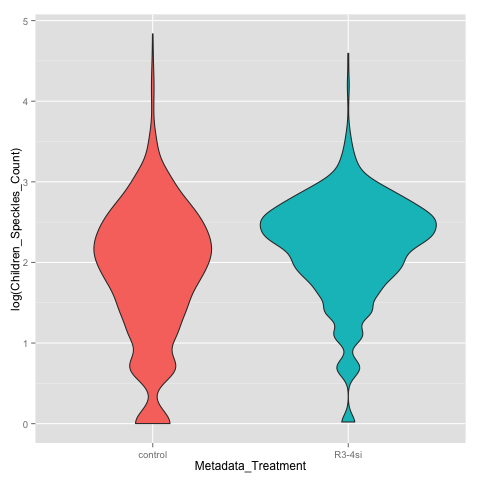

In [50]:
%%R
library(ggplot2)

plot.sp.c=ggplot() 
plot.sp.c= plot.sp.c+geom_violin(data=df_sn,aes(x=Metadata_Treatment,y=log(Children_Speckles_Count) ,fill=factor(Metadata_Treatment)))
plot.sp.c+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#ggsave('../Plots/TPX2_violin_Math_AspectRatio_5.pdf')

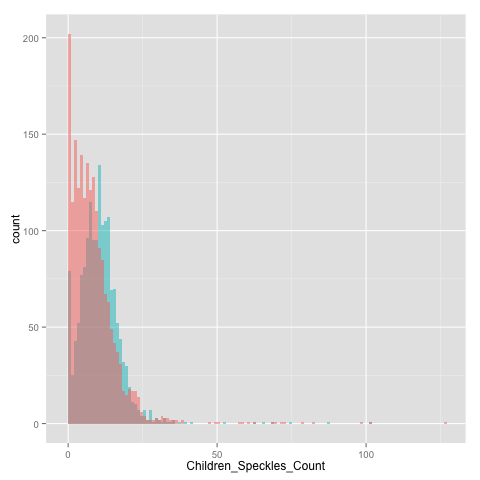

In [51]:
%%R
plot.sp.hist = ggplot()
plot.sp.hist = plot.sp.hist + geom_histogram(data=df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",], aes(x=Children_Speckles_Count), binwidth = 1, fill='#00BFC4', alpha=0.5)
plot.sp.hist = plot.sp.hist + geom_histogram(data=df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",], aes(x=Children_Speckles_Count), binwidth = 1, fill='#F8766D', alpha=0.5)

plot.sp.hist

Are the two different?

In R implementation KS test [does not deal well with discrete distributions](http://davetang.org/muse/2012/04/17/comparing-different-distributions/). The main reason for this are ties (non-unique values).

In [52]:
%%R
y=df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count
x=df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count
ks.test(x,y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.21599, p-value < 2.2e-16
alternative hypothesis: two-sided



As it is count data, it should follow Poisson distribution (p. 237, p. 250). See also count data in the R book.

In [53]:
%%R 
#print(table(df_sn$Children_Speckles_Count))
print('knockdown:')
print(table(df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count))
print('control:')
print(table(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count))

[1] "knockdown:"

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 79  25  43  52  77  81  96 115  95  95 134 103 105 107  69  70  52  44  32  30 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  37  39  41  52 
 19  11  10   7   4   7   2   7   1   3   2   1   3   1   1   2   1   1   1   1 
 62  65  68  74  87 101 
  1   1   1   1   1   1 
[1] "control:"

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
202 115 147 122 139 117 135 121 128 110  91  85  67  63  49  42  37  31  17  15 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  47  49 
 18  17  17  14   6   4   2   2   2   3   2   4   3   3   2   2   2   2   1   1 
 50  57  58  60  62  68  69  71  72  78  82  98 101 126 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1 


The assumption behind Poisson, though, is that mean = variance. This is not the case here. 

In [54]:
%%R
print(tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, mean))
print(tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, var))

  control    R3-4si 
 8.085977 10.289028 
 control   R3-4si 
76.72788 53.12281 


In [55]:
%%R
tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, var)[1]/tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, mean)[1]

 control 
9.489005 


In [56]:
%%R
tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, var)[2]/tapply(df_sn$Children_Speckles_Count, df_sn$Metadata_Treatment, mean)[2]

  R3-4si 
5.163054 


The above show that in both cases the data is overdispersed.

In [57]:
%%R
print(length(x))
print(length(y))

[1] 1954
[1] 1595


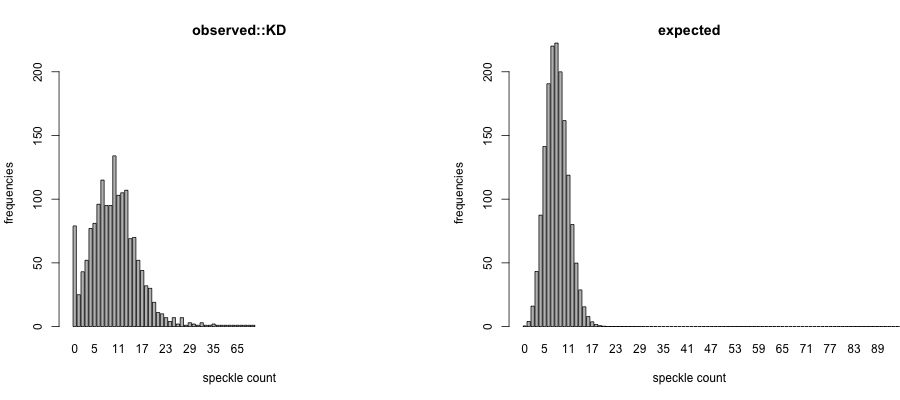

In [58]:
%%R -w 900 -h 400 -u px
par(mfrow=c(1,2))

barplot(table(df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count), ylim=c(0,210),ylab = 'frequencies', xlab = 'speckle count', main = 'observed::KD', xlim=c(0,101))
barplot(dpois(0:101,8.085977)*1595, xlim=c(0,101), ylim=c(0,210),names=as.character(0:101),ylab = 'frequencies', xlab = 'speckle count', main = 'expected')

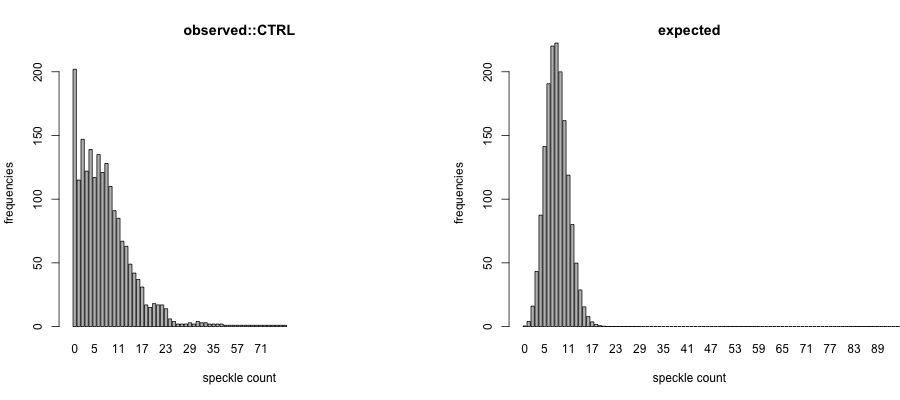

In [59]:
%%R -w 900 -h 400 -u px
par(mfrow=c(1,2))

barplot(table(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count), ylim=c(0,210),ylab = 'frequencies', xlab = 'speckle count', main = 'observed::CTRL', xlim=c(0,101))
barplot(dpois(0:101,8.085977)*1595, xlim=c(0,101), ylim=c(0,210),names=as.character(0:101),ylab = 'frequencies', xlab = 'speckle count', main = 'expected')

Is the negative binomial better?

[1] 0.9525236


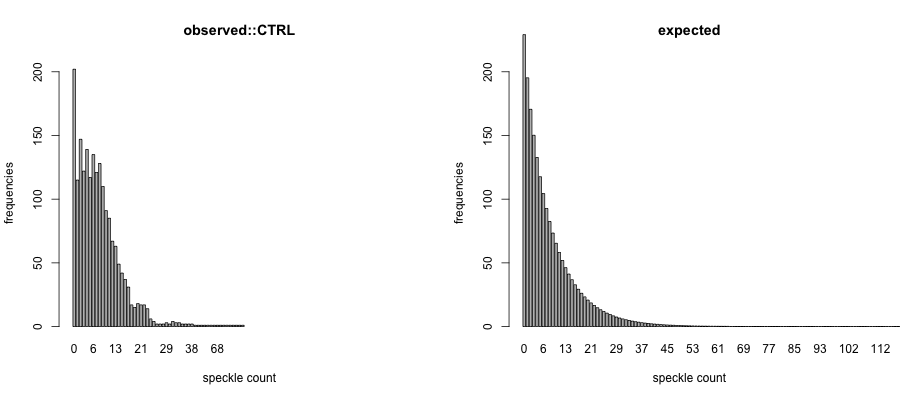

In [60]:
%%R -w 900 -h 400 -u px
par(mfrow=c(1,2))

k.ctrl=mean(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count)^2/(var(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count)-mean(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count))
print(k.ctrl)
expected.ctrl = dnbinom(0:126,size=k.ctrl,mu=8.085977)*1954 
barplot(table(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count), ylim=c(0,210),ylab = 'frequencies', xlab = 'speckle count', main = 'observed::CTRL', xlim=c(0,126))
barplot(expected.ctrl , xlim=c(0,126), ylim=c(0,210),names=as.character(0:126),ylab = 'frequencies', xlab = 'speckle count', main = 'expected')


[1] 1.542266


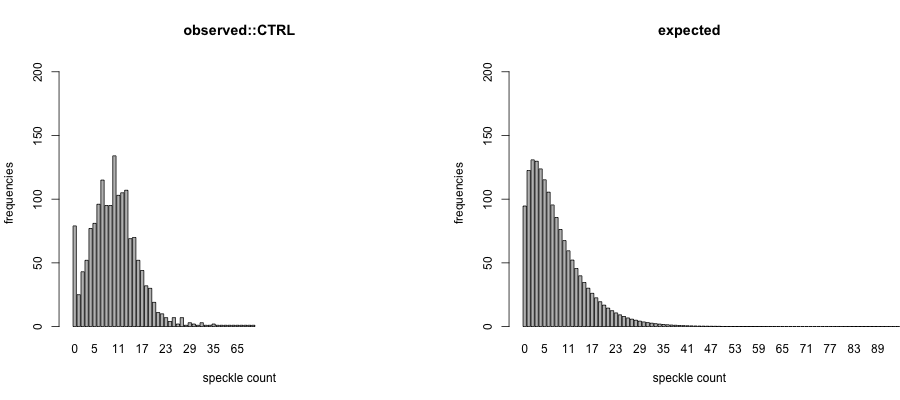

In [61]:
%%R -w 900 -h 400 -u px
par(mfrow=c(1,2))

k.kd=mean(df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count)^2/(var(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count)-mean(df_sn[df_sn[,'Metadata_Treatment']!="R3-4si",]$Children_Speckles_Count))
print(k.kd)
expected.kd = dnbinom(0:101,size=k.kd,mu=8.085977)*1595  
barplot(table(df_sn[df_sn[,'Metadata_Treatment']=="R3-4si",]$Children_Speckles_Count), ylim=c(0,210),ylab = 'frequencies', xlab = 'speckle count', main = 'observed::CTRL', xlim=c(0,101))
barplot(expected.kd , xlim=c(0,101), ylim=c(0,210),names=as.character(0:101),ylab = 'frequencies', xlab = 'speckle count', main = 'expected')

In [62]:
%%R 
expected.kd

  [1] 9.463702e+01 1.225761e+02 1.308526e+02 1.297561e+02 1.237445e+02
  [6] 1.151937e+02 1.054851e+02 9.545097e+01 8.559510e+01 7.621551e+01
 [11] 6.747809e+01 5.946298e+01 5.219475e+01 4.566256e+01 3.983362e+01
 [16] 3.466238e+01 3.009669e+01 2.608201e+01 2.256404e+01 1.949053e+01
 [21] 1.681231e+01 1.448388e+01 1.246365e+01 1.071399e+01 9.201105e+00
 [26] 7.894867e+00 6.768539e+00 5.798508e+00 4.964004e+00 4.246816e+00
 [31] 3.631022e+00 3.102741e+00 2.649896e+00 2.262000e+00 1.929968e+00
 [36] 1.645934e+00 1.403108e+00 1.195625e+00 1.018437e+00 8.671948e-01
 [41] 7.381594e-01 6.281190e-01 5.343166e-01 4.543878e-01 3.863063e-01
 [46] 3.283366e-01 2.789938e-01 2.370074e-01 2.012919e-01 1.709194e-01
 [51] 1.450981e-01 1.231517e-01 1.045036e-01 8.866201e-02 7.520772e-02
 [56] 6.378357e-02 5.408532e-02 4.585397e-02 3.886905e-02 3.294297e-02
 [61] 2.791616e-02 2.365292e-02 2.003789e-02 1.697304e-02 1.437505e-02
 [66] 1.217315e-02 1.030723e-02 8.726262e-03 7.386918e-03 6.252424e-03
 [71] 

Analysis of deviance (unexplained variation):

In [63]:
%%R
m.1.simple = glm(df_sn$Children_Speckles_Count ~ df_sn$Metadata_Treatment, family=poisson)
summary(m.1.simple)


Call:
glm(formula = df_sn$Children_Speckles_Count ~ df_sn$Metadata_Treatment, 
    family = poisson)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.536  -1.833  -0.391   0.971  21.359  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    2.090131   0.007956  262.73   <2e-16 ***
df_sn$Metadata_TreatmentR3-4si 0.240947   0.011146   21.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 21119  on 3548  degrees of freedom
Residual deviance: 20652  on 3547  degrees of freedom
AIC: 33372

Number of Fisher Scoring iterations: 5



Residual deviance (20652) is much greater than the residual degrees of freedom (3547) indicating substantial overdisperssion (greater variability in data than what would be expected given the model).

In [64]:
%%R
m.2.simple = glm(df_sn$Children_Speckles_Count ~ df_sn$Metadata_Treatment, family=quasipoisson)
summary(m.2.simple)


Call:
glm(formula = df_sn$Children_Speckles_Count ~ df_sn$Metadata_Treatment, 
    family = quasipoisson)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.536  -1.833  -0.391   0.971  21.359  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.09013    0.02185   95.65  < 2e-16 ***
df_sn$Metadata_TreatmentR3-4si  0.24095    0.03062    7.87 4.67e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 7.544968)

    Null deviance: 21119  on 3548  degrees of freedom
Residual deviance: 20652  on 3547  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5



In [65]:
%%R
library(MASS)
df.mod = as.data.frame(cbind(df_sn$Children_Speckles_Count,df_sn$Metadata_Treatment))
#step required: http://stackoverflow.com/questions/16985965/non-comformable-arrays-error-when-using-xts-series-in-a-logistic-regression

In [66]:
%%R
library(MASS)
m.3.simple = glm.nb(V1 ~ V2, data = df.mod)
summary(m.3.simple, cor = F)


Call:
glm.nb(formula = V1 ~ V2, data = df.mod, init.theta = 1.724648672, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5875  -0.7667  -0.1586   0.3900   6.0367  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.84918    0.04318  42.824   <2e-16 ***
V2           0.24095    0.02801   8.603   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.7246) family taken to be 1)

    Null deviance: 4203.0  on 3548  degrees of freedom
Residual deviance: 4128.7  on 3547  degrees of freedom
AIC: 22758

Number of Fisher Scoring iterations: 1


              Theta:  1.7246 
          Std. Err.:  0.0511 

 2 x log-likelihood:  -22752.1540 


[Testing negative binomial against Poisson in a likelihood ratio test](http://stats.stackexchange.com/questions/49614/comparing-two-vectors-from-negative-binomial-distribution-in-r).

In [67]:
%%R
library(pscl)
odTest(m.3.simple)

Loading required package: lattice
Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University

Simon Jackman

hurdle and zeroinfl functions by Achim Zeileis

Likelihood ratio test of H0: Poisson, as restricted NB model:
n.b., the distribution of the test-statistic under H0 is non-standard
e.g., see help(odTest) for details/references

Critical value of test statistic at the alpha= 0.05 level: 2.7055 
Chi-Square Test Statistic =  10615.4164 p-value = < 2.2e-16 


[Additional details on fitting discrete distributions](http://stats.stackexchange.com/questions/66192/how-to-fit-a-discrete-distribution-to-count-data)

##ADD: other categorical variables for the analysis of deviance and run step-wise reduction of the model.

Does the speckle count correlate with any of the texture descriptors?

Lamin to internal signal ratio?

Internal signal per se?

### AWG favorite variables

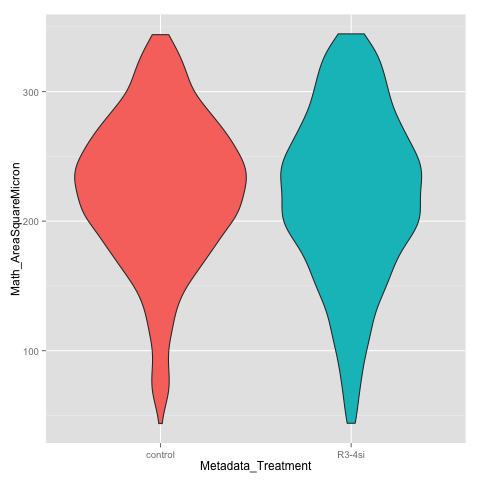

In [68]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.1.m=ggplot() 
plot.1.m = plot.1.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=Math_AreaSquareMicron ,fill=factor(Metadata_Treatment)))
plot.1.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#ggsave('../Plots/TPX2_violin_Math_AspectRatio_5.pdf')

In [69]:
pattern = re.compile('.*Area.*',re.IGNORECASE)

In [70]:
[re.match(pattern, colName).group() for colName in df_n.columns.tolist() if re.match(pattern, colName) != None]

['AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zer

In [71]:
pattern = re.compile('.*texture.*',re.IGNORECASE)
[re.match(pattern, colName).group() for colName in df_n.columns.tolist() if re.match(pattern, colName) != None]

['Texture_AngularSecondMoment_RawInput_10_0',
 'Texture_AngularSecondMoment_RawInput_10_90',
 'Texture_AngularSecondMoment_RawInput_5_0',
 'Texture_AngularSecondMoment_RawInput_5_90',
 'Texture_Contrast_RawInput_10_0',
 'Texture_Contrast_RawInput_10_90',
 'Texture_Contrast_RawInput_5_0',
 'Texture_Contrast_RawInput_5_90',
 'Texture_Correlation_RawInput_10_0',
 'Texture_Correlation_RawInput_10_90',
 'Texture_Correlation_RawInput_5_0',
 'Texture_Correlation_RawInput_5_90',
 'Texture_DifferenceEntropy_RawInput_10_0',
 'Texture_DifferenceEntropy_RawInput_10_90',
 'Texture_DifferenceEntropy_RawInput_5_0',
 'Texture_DifferenceEntropy_RawInput_5_90',
 'Texture_DifferenceVariance_RawInput_10_0',
 'Texture_DifferenceVariance_RawInput_10_90',
 'Texture_DifferenceVariance_RawInput_5_0',
 'Texture_DifferenceVariance_RawInput_5_90',
 'Texture_Entropy_RawInput_10_0',
 'Texture_Entropy_RawInput_10_90',
 'Texture_Entropy_RawInput_5_0',
 'Texture_Entropy_RawInput_5_90',
 'Texture_InfoMeas1_RawInput_10_

In [72]:
pattern = re.compile('.*area.*',re.IGNORECASE)
[re.match(pattern, colName).group() for colName in df_n.columns.tolist() if re.match(pattern, colName) != None]

['AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zer

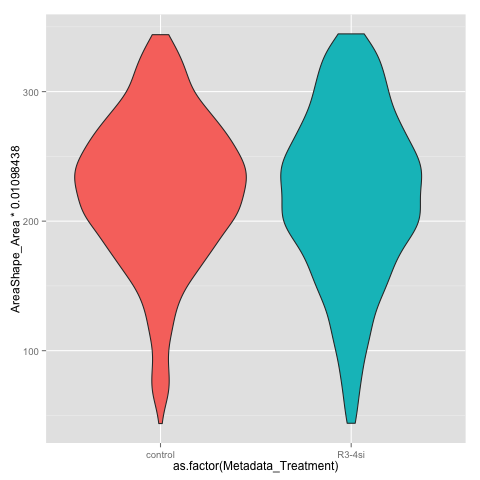

In [73]:
%%R
#Math_AreaSquareMicron 
plot.1.a=ggplot() 
plot.1.a = plot.1.a+geom_violin(data=df_n,aes(x=as.factor(Metadata_Treatment),y=AreaShape_Area*0.01098438 ,fill=factor(Metadata_Treatment)))
plot.1.a+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#ggsave('../Plots/Nuclei_Area_orig.pdf')

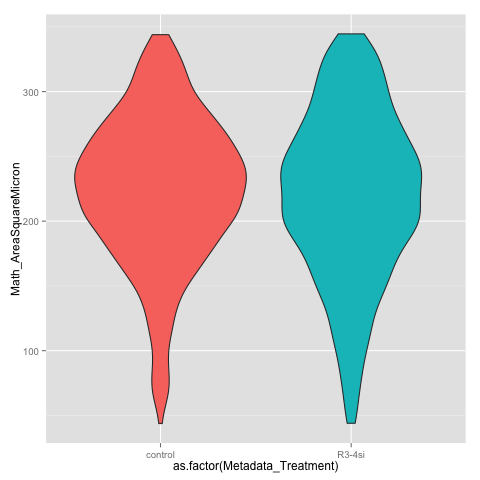

In [74]:
%%R
#Math_AreaSquareMicron 
plot.1.a=ggplot() 
plot.1.a = plot.1.a+geom_violin(data=df_n,aes(x=as.factor(Metadata_Treatment),y=Math_AreaSquareMicron ,fill=factor(Metadata_Treatment)))
plot.1.a+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#plot.1 = plot.1+geom_violin(data=df_cont,aes(x=Metadata_Treatment,y=1/Math_AspectRatio ,fill=factor(Metadata_Treatment)))
#plot.1+theme(legend.position='none')+scale_fill_manual(values=c('#7F7F7F','#179B33'))

#ggsave('../Plots/Nuclei_Area_alternative.pdf')

In [75]:
%%R
length(df_n)

[1] 155


As we don't know a priori which variables are different, we will correct for multiple comparisons. The n for BH correction will be the number of numerical variables in the dataset. See above.

In [76]:
%%R
C=df_n[df_n$Metadata_Treatment!='R3-4si',]$Math_AreaSquareMicron
E=df_n[df_n$Metadata_Treatment=='R3-4si',]$Math_AreaSquareMicron
#plot(seq(0,1,length=length(C)), cumsum(sort(C)/sum(C)),type='l',col='blue',ylab='cumulative probability',xlab='index')
#lines( seq(0,1,length=length(E)), cumsum(sort(E)/sum(E)), col='red')
#print(ks.test(df_no_centers[df_no_centers$Metadata_Treatment==0,]$Euclidian_norm_centers,df_no_centers[df_no_centers$Metadata_Treatment!=0,]$Euclidian_norm_centers,))
print(ks.test(C,E)[[2]])
print(p.adjust(ks.test(C,E)[[2]], method = "BH", n=140))

[1] 0.0004227373
[1] 0.05918322


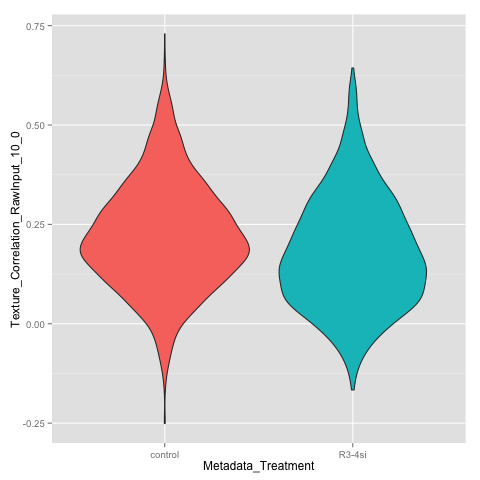

In [77]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_10_0
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_10_0 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#ggsave('../Plots/Nuclei_Texture_Correlation_RawInput_10_0_alternative.pdf')

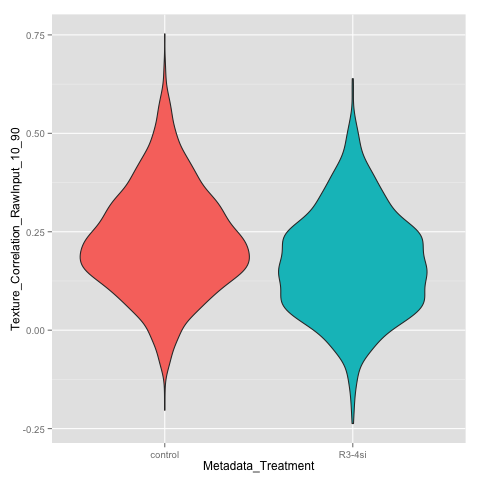

In [78]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_10_90 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_10_90_alternative.pdf')

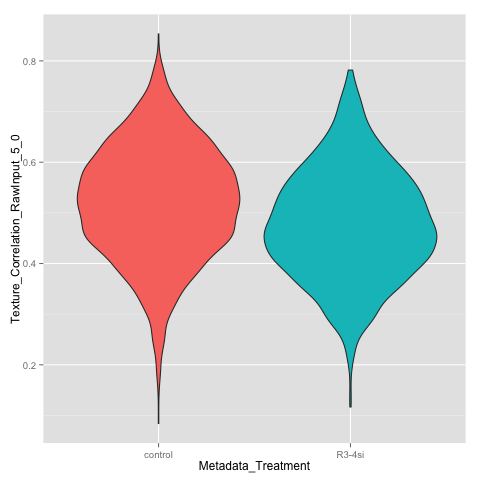

In [79]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_5_0
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_5_0 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_5_0_alternative.pdf')

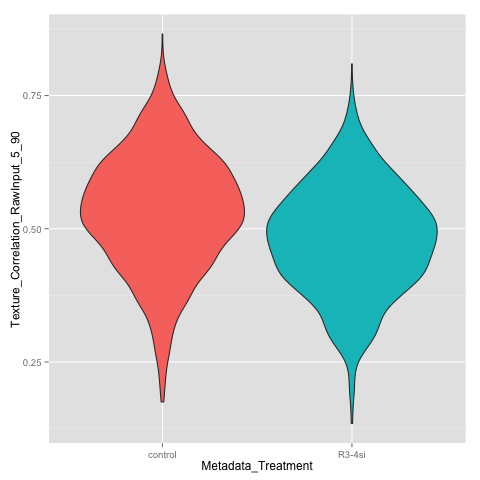

In [80]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_5_90 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_5_90 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_5_90_alternative.pdf')

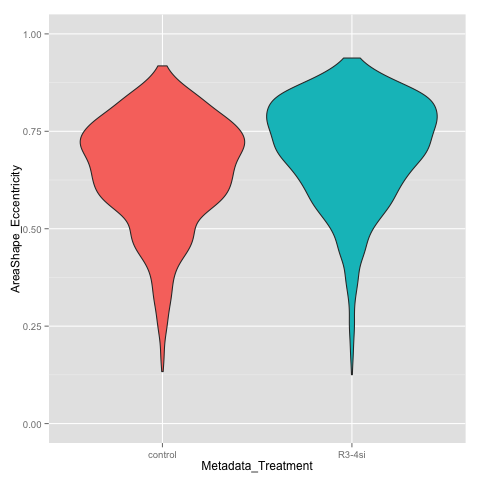

In [81]:
%%R
library(ggplot2)
#AreaShape_Eccentricity
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=AreaShape_Eccentricity ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))+ylim(0.0,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Eccentricity_alternative.pdf')

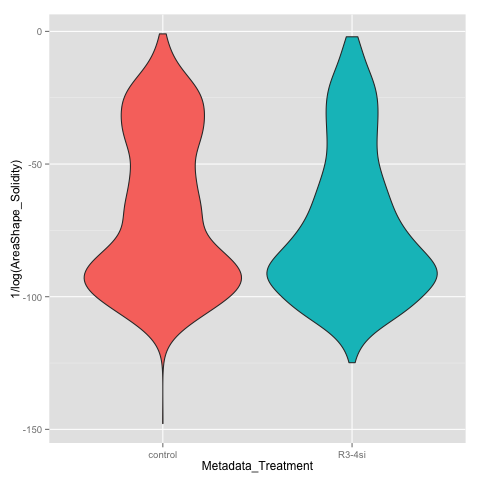

In [82]:
%%R
library(ggplot2)
#1/log(AreaShape_Solidity 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=1/log(AreaShape_Solidity) ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

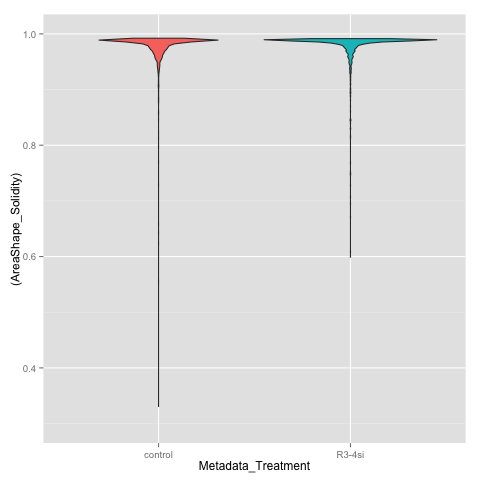

In [83]:
%%R
library(ggplot2)
#AreaShape_Solidity
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_n,aes(x=Metadata_Treatment,y=(AreaShape_Solidity) ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4')) + ylim(0.3,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Solidity_alternative.pdf')

In [84]:
%%R
C=df_n[df_n$Metadata_Treatment!='R3-4si',]$AreaShape_Solidity
E=df_n[df_n$Metadata_Treatment=='R3-4si',]$AreaShape_Solidity
#plot(seq(0,1,length=length(C)), cumsum(sort(C)/sum(C)),type='l',col='blue',ylab='cumulative probability',xlab='index')
#lines( seq(0,1,length=length(E)), cumsum(sort(E)/sum(E)), col='red')
#print(ks.test(df_no_centers[df_no_centers$Metadata_Treatment==0,]$Euclidian_norm_centers,df_no_centers[df_no_centers$Metadata_Treatment!=0,]$Euclidian_norm_centers,))
print(ks.test(C,E))


	Two-sample Kolmogorov-Smirnov test

data:  C and E
D = 0.096024, p-value = 1.853e-07
alternative hypothesis: two-sided



#IV. Data tranformation for modelling


Requires transforming data to normal like, centering and scaling. We'll use a maximum likelihood estimation of the transformation parameter.

In [85]:
%%R
library(caret)
convert_data_type=function(data_frame){

    for (col in names(data_frame)){
        data_frame[,col]<-as.numeric(data_frame[,col])
    }
    
    return(data_frame)
}

df_n_num=convert_data_type(df_n_num)
df_sn_num=convert_data_type(df_sn_num)
df_sp_num =convert_data_type(df_sp_num)


In [86]:
%%R
trans_n = preProcess(df_n_num, method=c('BoxCox','center','scale'))
trans_sn = preProcess(df_sn_num, method=c('BoxCox','center','scale'))
trans_sp = preProcess(df_sp_num, method=c('BoxCox','center','scale'))

In [87]:
%%R
df_n_num_trans = predict(trans_n, df_n_num)
df_sn_num_trans = predict(trans_sn, df_sn_num)
df_sp_num_trans = predict(trans_sp, df_sp_num)

#V. Feature selection


From experimental point of view, this may be the most actionable information.

#V. Classification model for phenotype scoring


Allows for unbiased experiment quantification based on the CP output.